In [70]:
import sklearn
import torch
torch.manual_seed(42)

In [71]:
from sklearn.datasets import make_circles

In [72]:
n_samples=1000
X,y=make_circles(n_samples,
                 noise=0.02,
                 random_state=42)

In [73]:
import pandas as pd
pd.DataFrame({"X1" : X[:,0],
              "X2": X[:,1],
              "label":y})

,X1,X2,label
0,0.760266,0.223878,1
1,-0.767222,0.145542,1
2,-0.808159,0.148944,1
3,-0.376028,0.703209,1
4,0.440510,-0.897617,0
...,...,...,...
995,0.241536,0.953294,0
996,-0.975298,-0.264479,0
997,-0.141235,-0.801951,1
998,0.675090,-0.754657,0


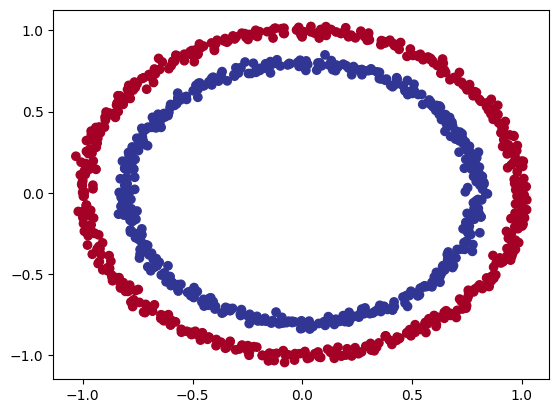

In [74]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],
            X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [75]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)

In [77]:
y_test.shape

torch.Size([200])

In [78]:
import torch
from torch import nn
device="cuda" if torch.cuda.is_available() else "cpu"

In [79]:
device

'cpu'

In [80]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=8)
    self.layer2=nn.Linear(in_features=8,out_features=1)
  def forward(self,x):
    return self.layer2(self.layer1(x))

In [81]:
model_0=CircleModelV0()

In [82]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]])),
             ('layer1.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691])),
             ('layer2.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003]])),
             ('layer2.bias', tensor([0.2730]))])

In [83]:

model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=8),
    nn.Linear(in_features=8,out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16,out_features=1),
)
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1177, -0.2296],
                      [ 0.4370,  0.1102],
                      [ 0.5713,  0.0773],
                      [-0.2230,  0.1900],
                      [-0.1918,  0.2976],
                      [ 0.6313,  0.4087],
                      [-0.3091,  0.4082],
                      [ 0.1265,  0.3591]])),
             ('0.bias',
              tensor([-0.4310, -0.7000, -0.2732, -0.5424,  0.5802,  0.2037,  0.2929,  0.2236])),
             ('1.weight',
              tensor([[-0.0062,  0.2767, -0.2512,  0.0223, -0.2413,  0.1090, -0.1218,  0.1083],
                      [-0.0737,  0.2932, -0.2096, -0.2109, -0.2109,  0.3180,  0.1178,  0.3402],
                      [-0.2918, -0.3507, -0.2766, -0.2378,  0.1432,  0.1266,  0.2938, -0.1826],
                      [-0.2410,  0.1876, -0.1429,  0.2146, -0.0839,  0.2022, -0.2747, -0.1784],
                      [ 0.1078,  0.0747, -0.0901,  0.2107,  0.2403, -0.2564, -0.1888,  0.3237],
        

In [84]:
with torch.inference_mode():
  prediction=model_0(X_test)
y_test.shape
prediction[:10]


tensor([[-0.0830],
        [-0.0483],
        [-0.0747],
        [-0.0701],
        [-0.0750],
        [-0.0641],
        [-0.0184],
        [-0.0146],
        [-0.0752],
        [-0.0442]])

In [85]:
import numpy as np

pd.DataFrame({"test":np.array(torch.tensor(y_test).numpy()),
              "prediction":np.array(torch.tensor(torch.round(prediction.squeeze())).numpy())})

<ipython-input-85-c93be397e38b>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pd.DataFrame({"test":np.array(torch.tensor(y_test).numpy()),
<ipython-input-85-c93be397e38b>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "prediction":np.array(torch.tensor(torch.round(prediction.squeeze())).numpy())})


,test,prediction
0,1.0,-0.0
1,0.0,-0.0
2,1.0,-0.0
3,0.0,-0.0
4,1.0,-0.0
...,...,...
195,0.0,-0.0
196,1.0,-0.0
197,0.0,-0.0
198,1.0,-0.0


In [86]:
loss_fn=nn.BCEWithLogitsLoss()

In [87]:
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)

In [88]:
def accuracy(pred,true):
  accu=torch.eq(pred,true).sum().item()
  accuracy=(accu/len(pred))*100
  return accuracy

In [89]:
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0830],
        [-0.0483],
        [-0.0747],
        [-0.0701],
        [-0.0750]])

In [90]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [91]:
y_logits_sigmoid=torch.sigmoid(y_logits)

In [92]:
y_logits_sigmoid_round=y_logits_sigmoid.squeeze().round()

In [93]:
accuracy(y_logits_sigmoid_round,y_test[:5])

40.0

In [94]:
torch.manual_seed(42)

In [95]:
epochs=20000
for epoch in range(epochs):
  model_0.train()
  y_logits=model_0(X_train).squeeze()
  loss=loss_fn(y_logits,y_train)
  accu=accuracy(torch.sigmoid(y_logits).round(),y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if(epoch%1000==0):
    print(accu,loss)

50.0 tensor(0.6951, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
51.5 tensor(0.6913, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
53.75 tensor(0.6890, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
55.00000000000001 tensor(0.6865, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
62.625 tensor(0.6832, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
60.5 tensor(0.6787, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
59.75 tensor(0.6727, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
59.5 tensor(0.6649, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
60.375 tensor(0.6544, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
66.875 tensor(0.6382, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
77.875 tensor(0.6089, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
92.125 tensor(0.5619, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
96.625 tensor(0.4906, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
98.75 tensor(0.3944, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
100.0 

In [96]:
with torch.inference_mode():
  prediction=model_0(X_test)
accuracy(torch.sigmoid(prediction.squeeze()).round(),y_test)

100.0

In [97]:
import requests
from pathlib import Path

In [98]:
if(Path("helper_functions.py").is_file()):
  print("helper function file already exists")
else:
  req=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(req.content)

helper function file already exists


In [99]:
from helper_functions import plot_decision_boundary, plot_predictions

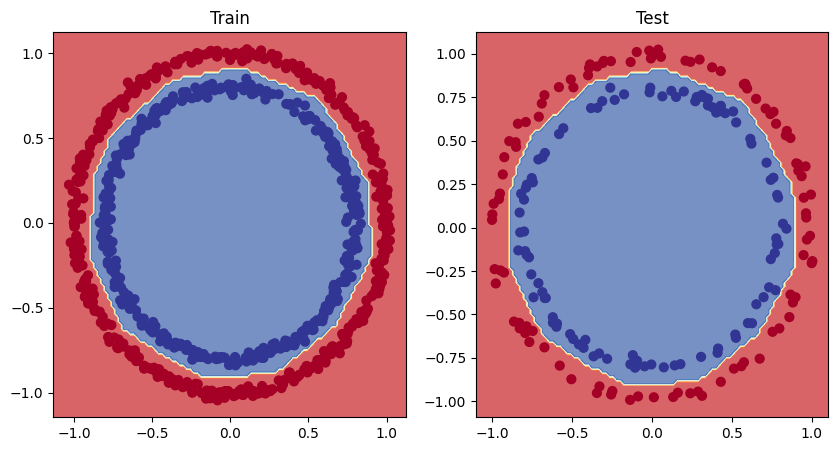

In [100]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

In [101]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Sample Data
X=np.array([[1],[2],[3]])
y=2*X+3

# Train Model
model = LinearRegression()
model.fit(X,y)

# Make Predictions
pred = model.predict([[5]])
print(pred)  # Output: [10.]


[[13.]]


In [105]:
from sklearn.datasets import make_circles
n_samples=10000
X,y=make_circles(n_samples,
                 noise=0.04,
                 random_state=18)

In [108]:
X[0,0]

0.8565558489198382